Creating Match Reports

In [1]:
from utils import load_display_options, ignore_warnings
load_display_options()
ignore_warnings()

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from reports.report import Report

Match Specific Plots

In [3]:
from chain_utils import get_teams

In [4]:
from visualisation.plotting_match_information import plot_match_information
from visualisation.plotting_expected_score import plot_vertical_pitch_team_expected_score
from visualisation.plotting_expected_score_worm import plot_expected_score_worm
from visualisation.plotting_expected_vaep_scatter import plot_match_expected_diamond_plot
from visualisation.plotting_expected_vaep_heatmap import plot_expected_vaep_heatmap

In [5]:
summary = pd.read_csv("/Users/ciaran/Documents/Projects/AFL/git-repositories/afl-playing-styles/data/match_summary.csv")
chains = pd.read_csv("/Users/ciaran/Documents/Projects/AFL/git-repositories/afl-playing-styles/data/playing_style_chains_v2.csv")
player_stats = pd.read_csv("/Users/ciaran/Documents/Projects/AFL/git-repositories/afl-playing-styles/data/playing_style_stats_v2.csv")

In [6]:
visualisation_path = "/Users/ciaran/Documents/Projects/AFL/git-repositories/afl-playing-styles/src/visualisation"
logo_file_path = visualisation_path + "/logos"

from visualisation.visualise import load_fonts
font_path = visualisation_path + "/fonts"
load_fonts(font_path)

# from visualisation.visualise import load_mpl_style
# style_path = visualisation_path + "/mplstyle/lilac_pitch_clusters.mplstyle"
# load_mpl_style(style_path)

In [7]:
def create_match_report(match_id):
    
    spec_settings = {
        'rows': 4,
        'columns': 3,
        'axes': {
            'ax1': {'position': (0, 0), 'span': (2, 1)},
            'ax2': {'position': (2, 0), 'span': (2, 1)},
            'ax3': {'position': (0, 1), 'span': (1, 1)},
            'ax4': {'position': (1, 1), 'span': (1, 1)},
            'ax5': {'position': (2, 1), 'span': (2, 1)},
            'ax7': {'position': (0, 2), 'span': (2, 1)},
            'ax8': {'position': (2, 2), 'span': (2, 1)},
        }
    }
    match_report = Report(spec_settings, width=30, height=15, hspace=0, wspace=0)

    home_team, away_team = get_teams(match_id)

    plot_match_information(ax = match_report.axes_dict['ax3'], summary = summary, match_id=match_id, logo_file_path=logo_file_path)
    plot_expected_score_worm(ax = match_report.axes_dict['ax4'], chain_data=chains, match_id=match_id)

    plot_vertical_pitch_team_expected_score(ax=match_report.axes_dict['ax1'], chain_data=chains, match_id=match_id, team = home_team, ec = "black", size_ratio=15)
    plot_vertical_pitch_team_expected_score(ax=match_report.axes_dict['ax7'], chain_data=chains, match_id=match_id, team = away_team, ec = "black", size_ratio=15)

    plot_match_expected_diamond_plot(fig = match_report.fig, ax = match_report.axes_dict['ax2'], player_stats = player_stats, match_id = match_id, team=home_team, x='xDisposal', y='exp_offensive_value', markersize=500)
    plot_match_expected_diamond_plot(fig = match_report.fig, ax = match_report.axes_dict['ax8'], player_stats = player_stats, match_id = match_id, team=away_team, x='xDisposal', y='exp_offensive_value', markersize=500)

    plot_expected_vaep_heatmap(ax = match_report.axes_dict['ax5'], chain_data=chains, match_id=match_id)

    match_report.fig.dpi = 300
    plt.tight_layout()

    return match_report

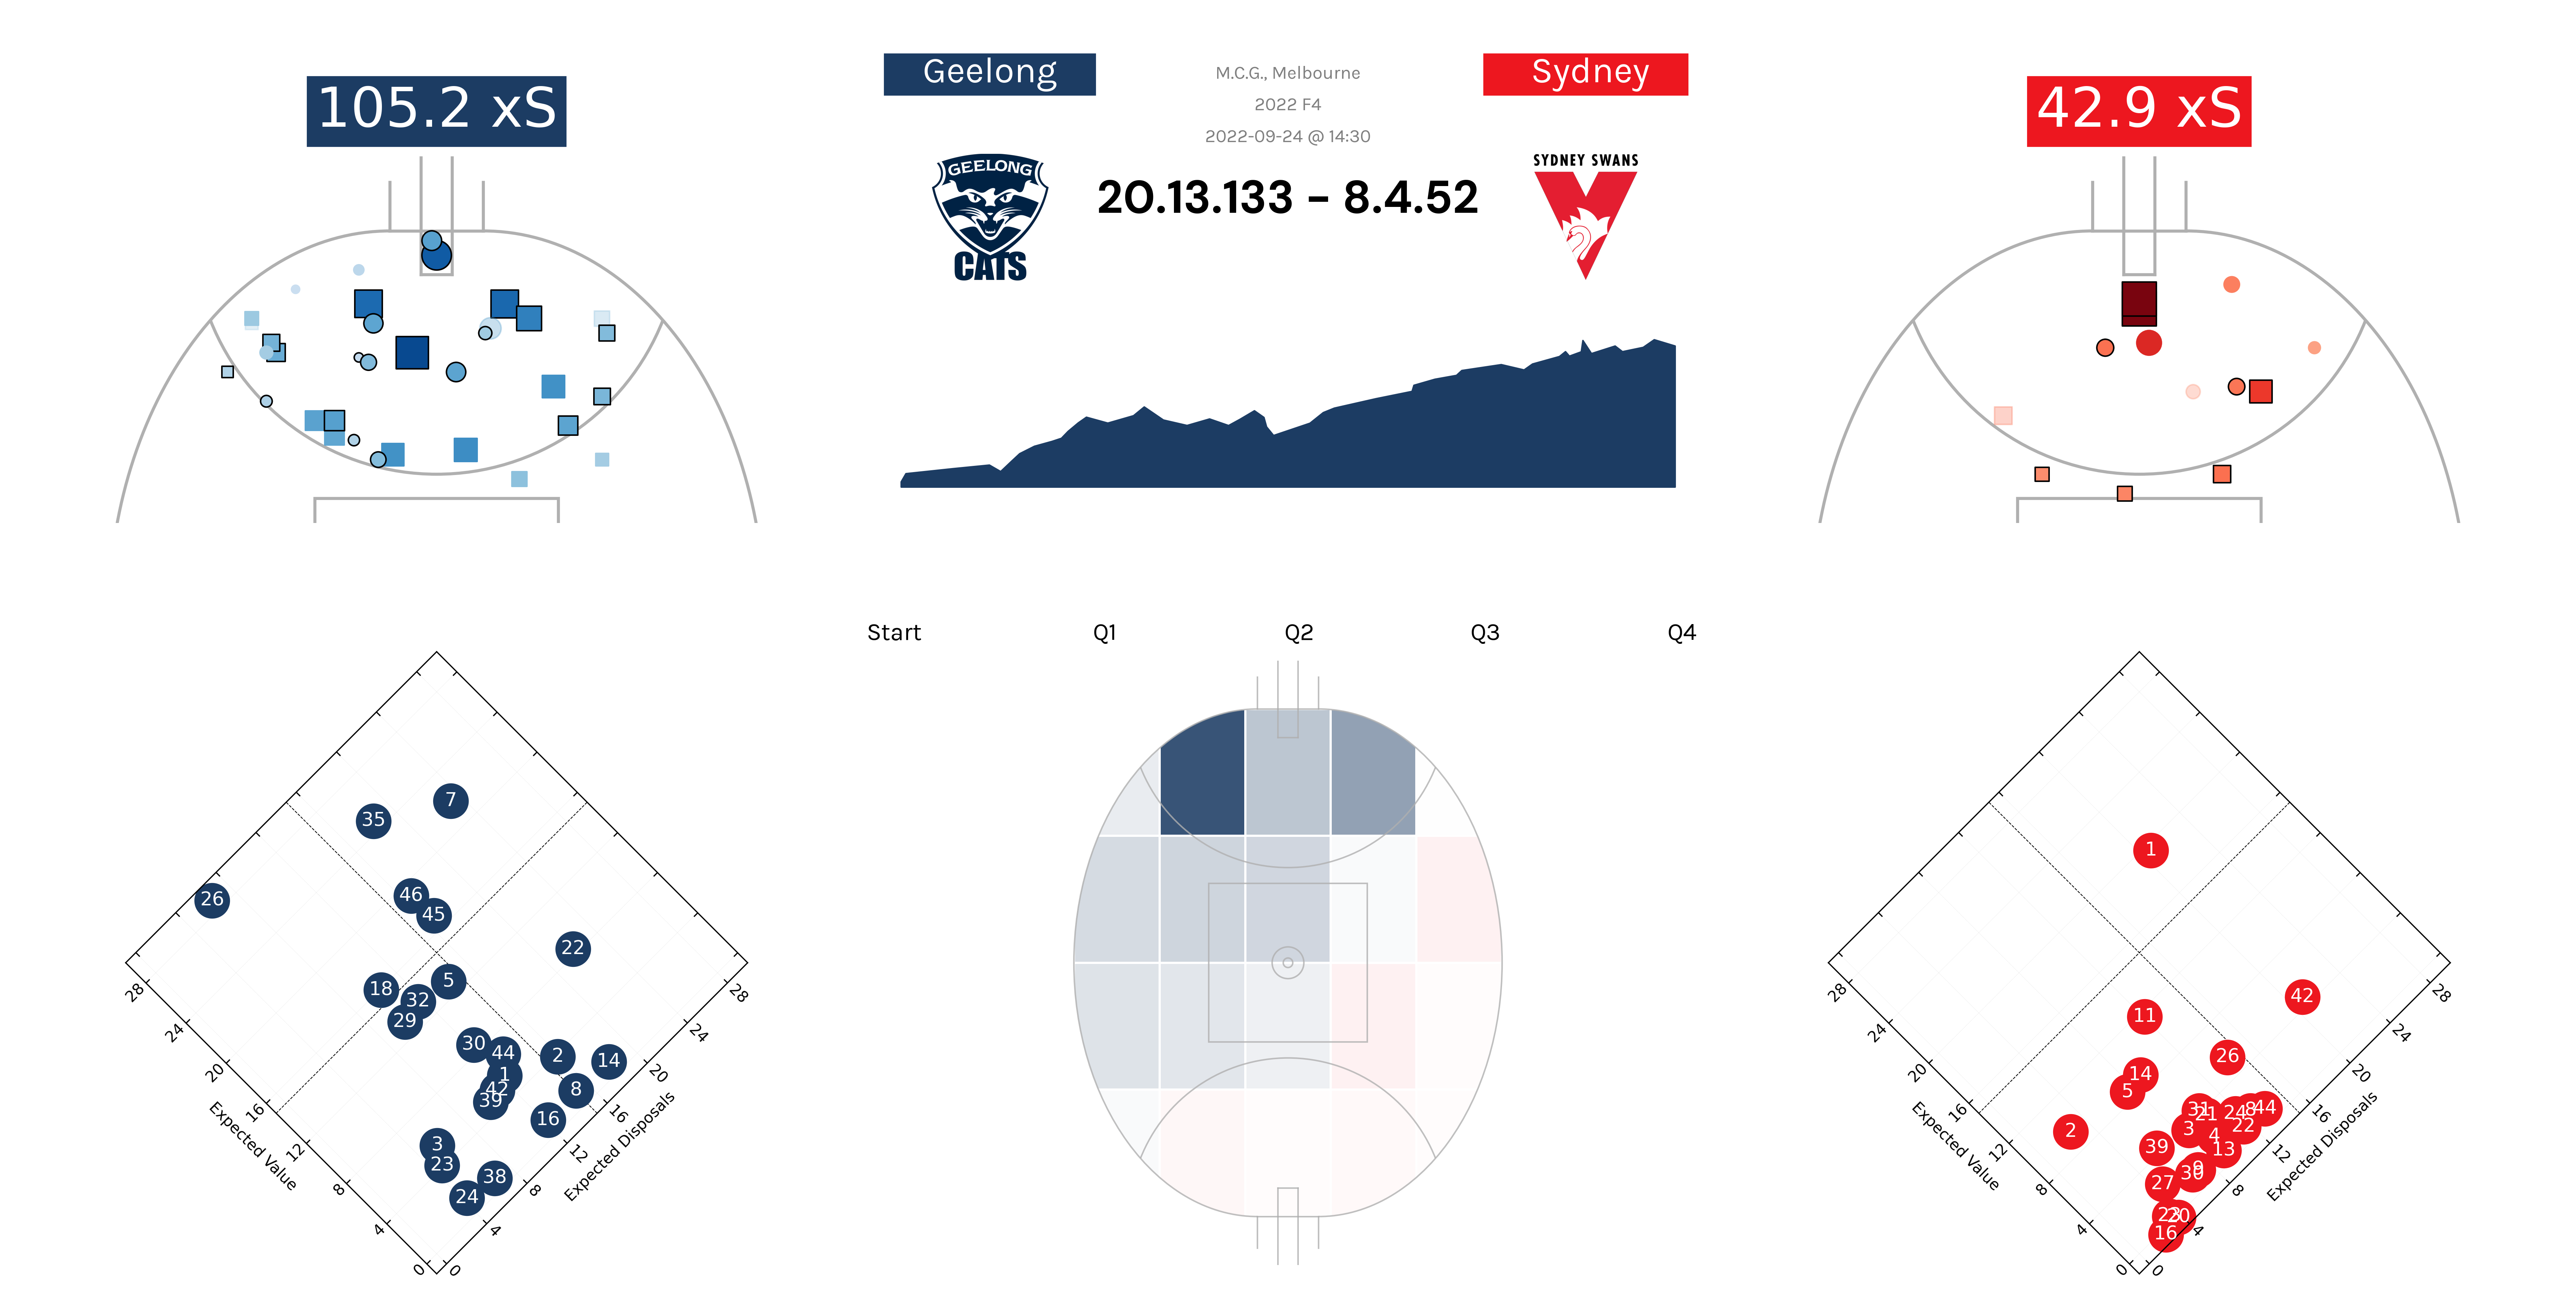

In [8]:
match_id = "2022F4_Geelong_Sydney"
match_report = create_match_report(match_id)

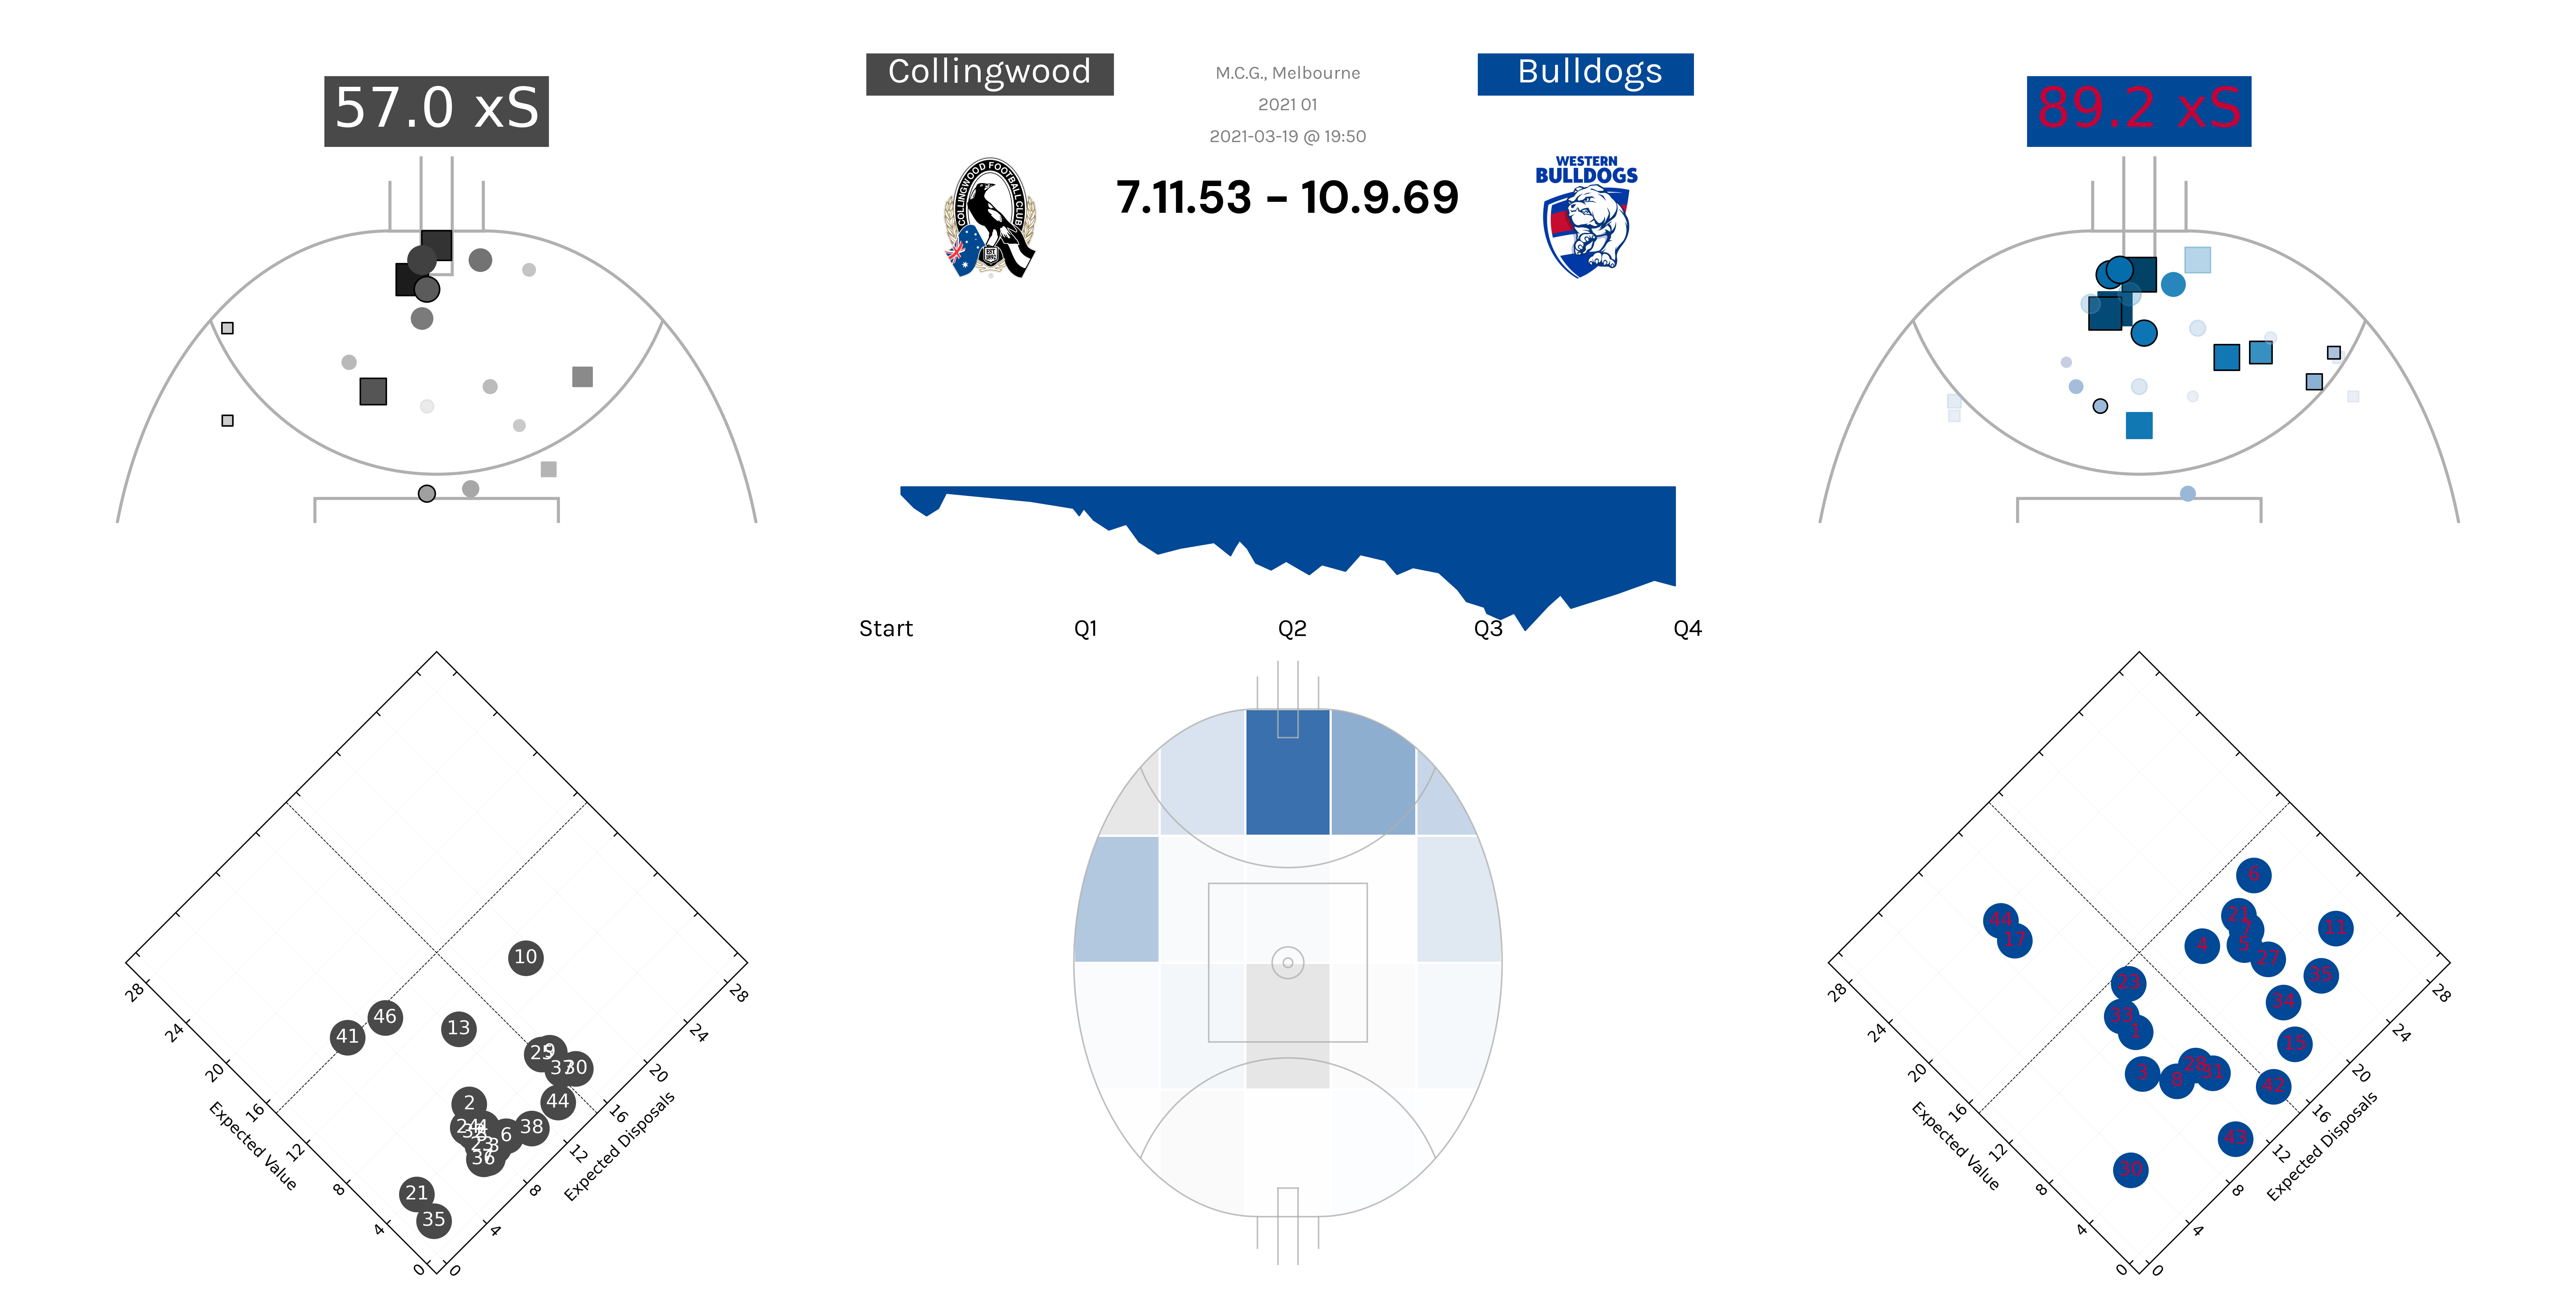

In [10]:
match_id = "202101_Collingwood_WesternBulldogs"
match_report = create_match_report(match_id)

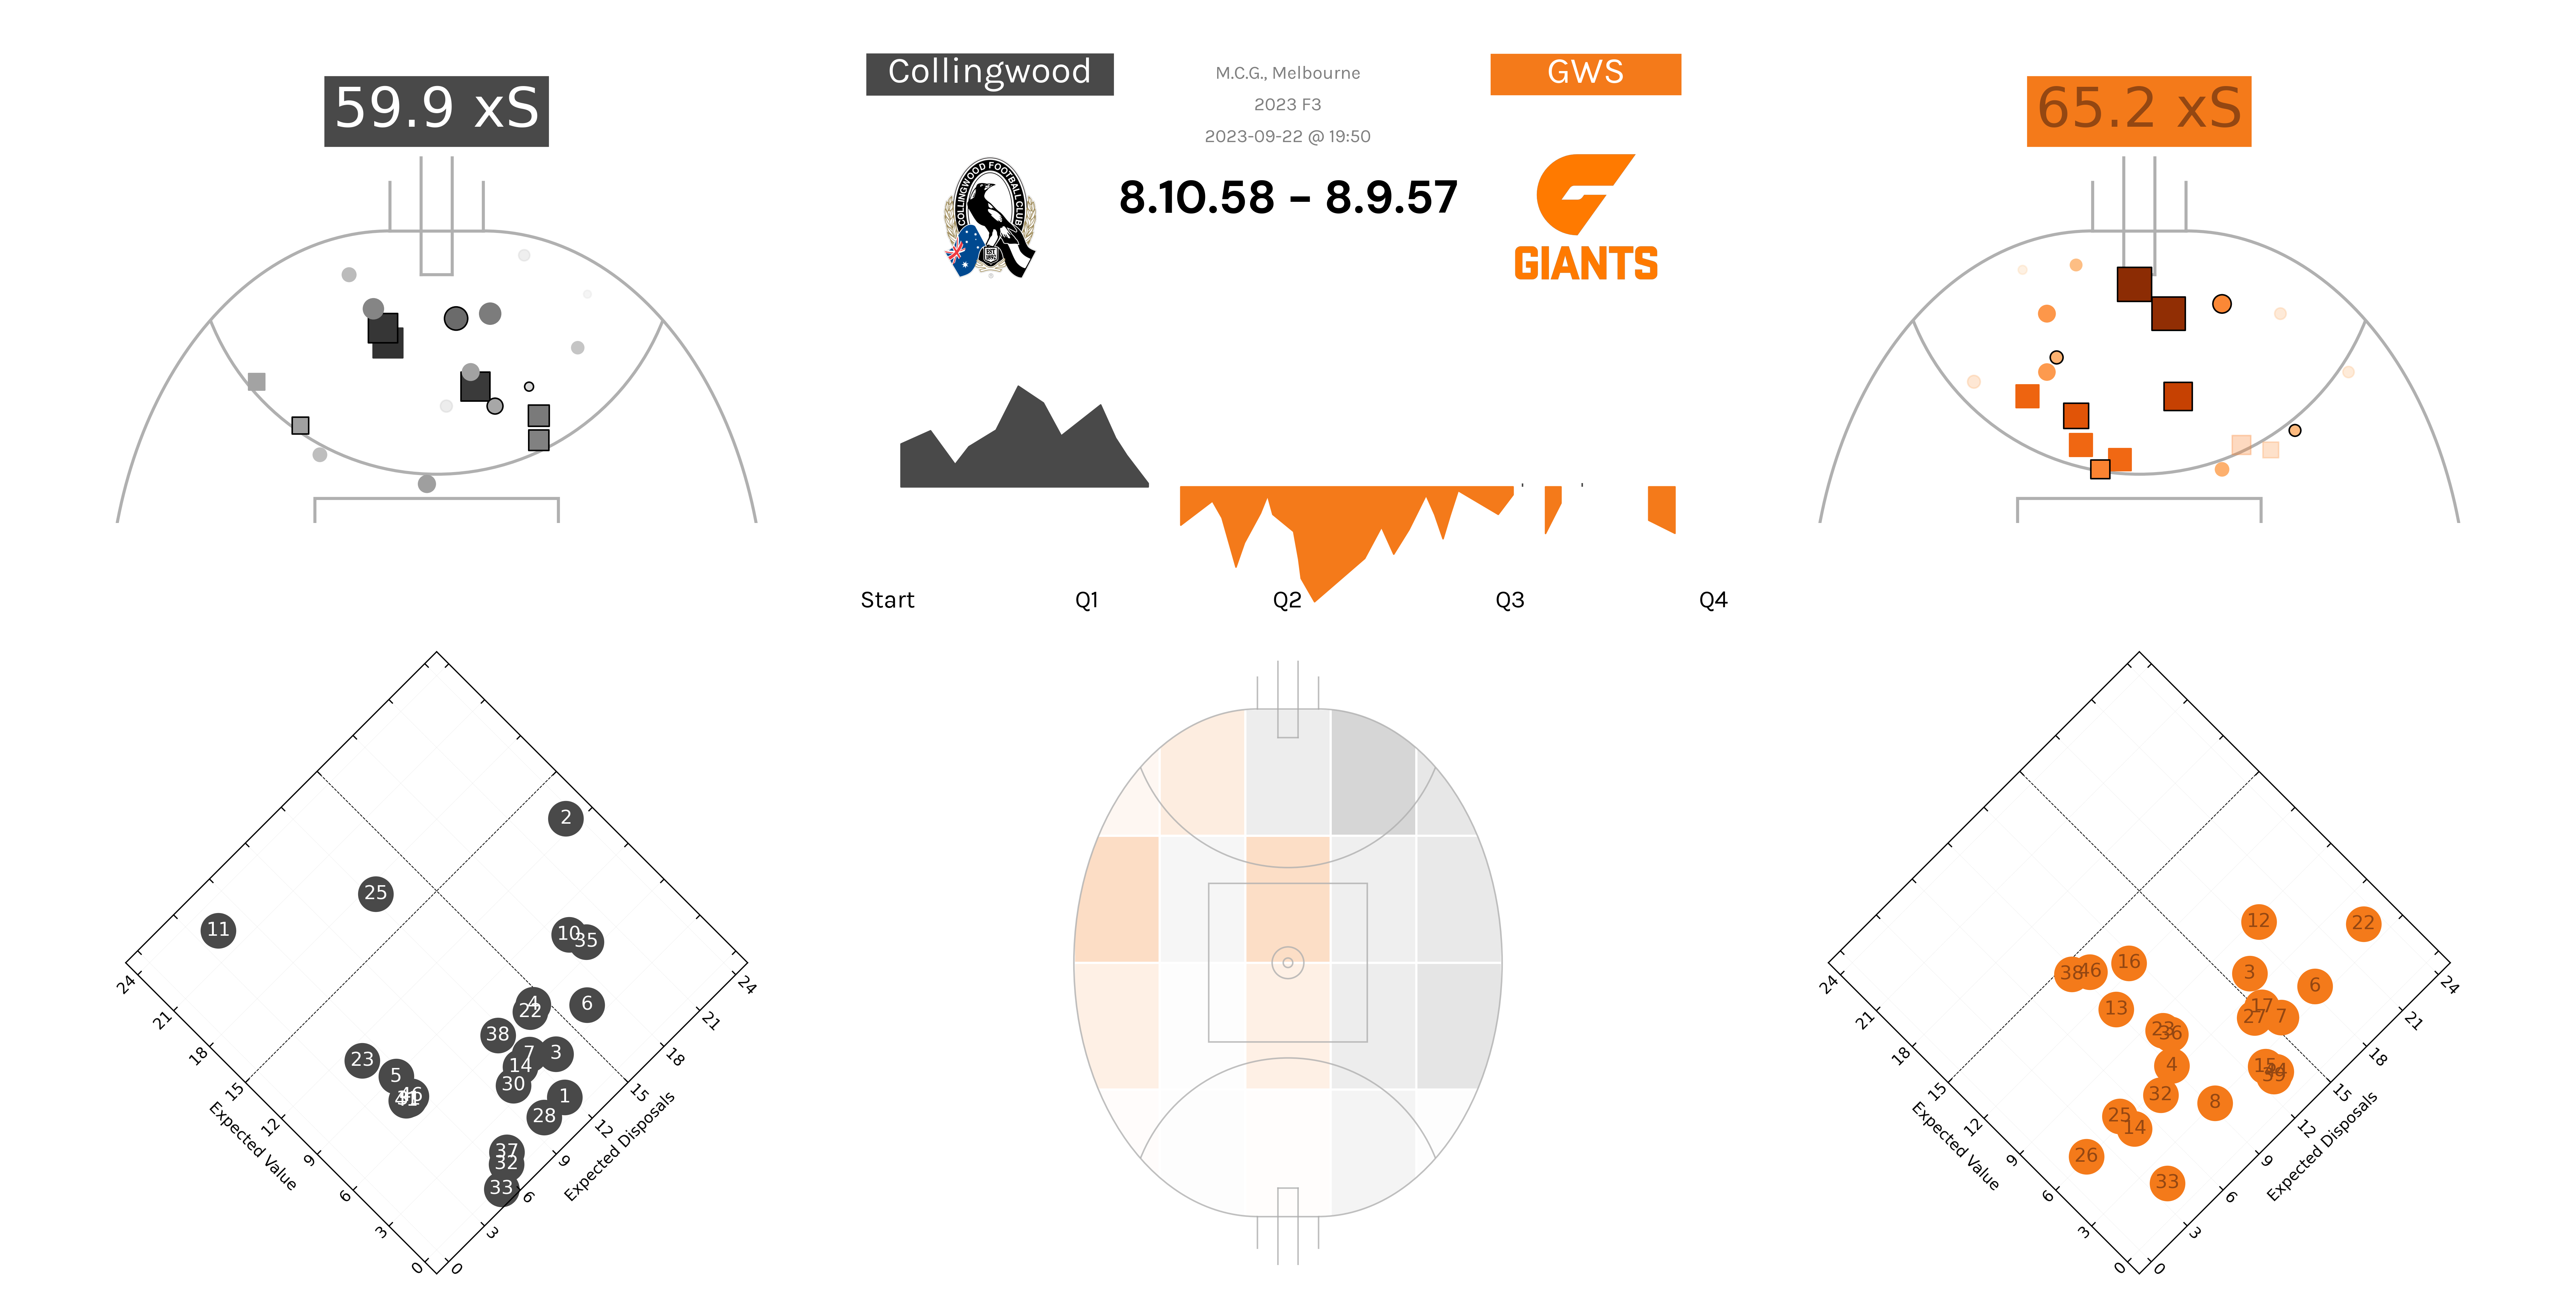

In [9]:
match_id = "2023F3_Collingwood_GreaterWesternSydney"
match_report = create_match_report(match_id)